In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
df = pd.read_parquet('./datasets/bechdel_ratings.parquet')
df = df.rename(columns={'rating': 'bechdel_rating'})
df.to_parquet('./datasets/bechdel_ratings.parquet', index=False)

Index(['id', 'imdb_id', 'original_title', 'title', 'budget',
       'original_language', 'overview', 'popularity', 'release_date',
       'revenue', 'runtime', 'tagline', 'vote_average', 'vote_count',
       'title_y', 'bechdel_rating', 'year', 'id_y'],
      dtype='object')


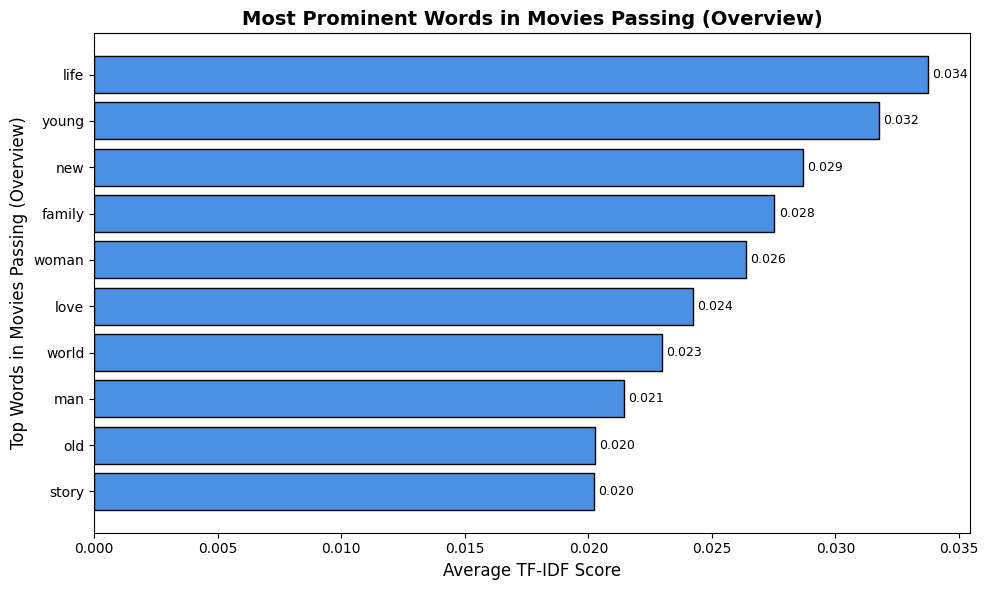

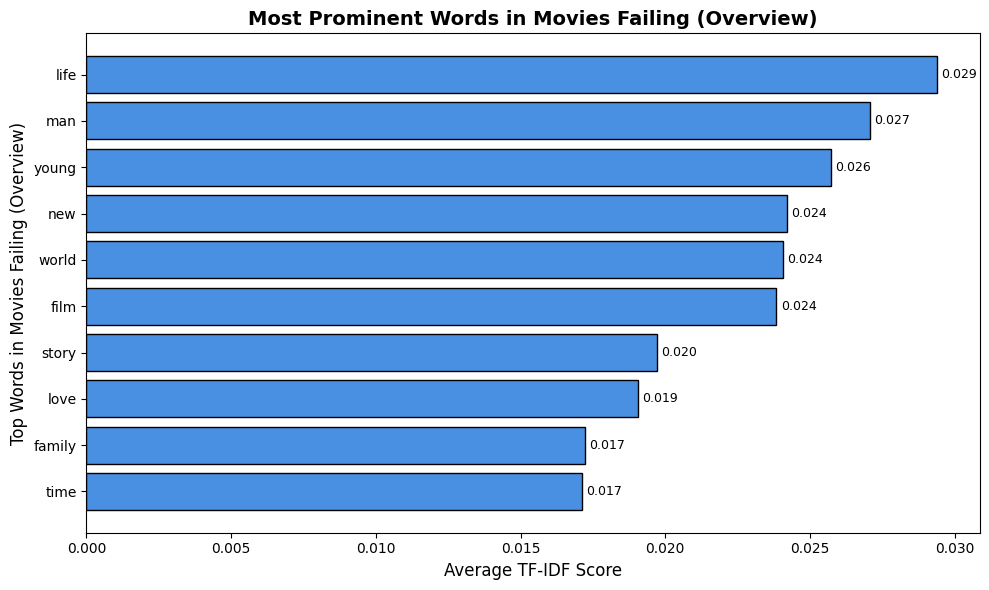

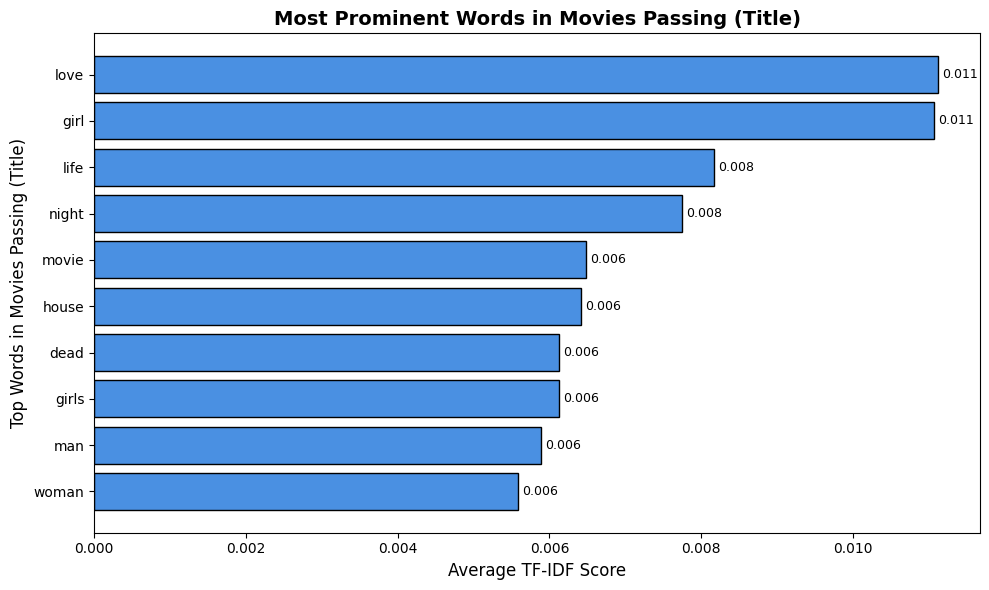

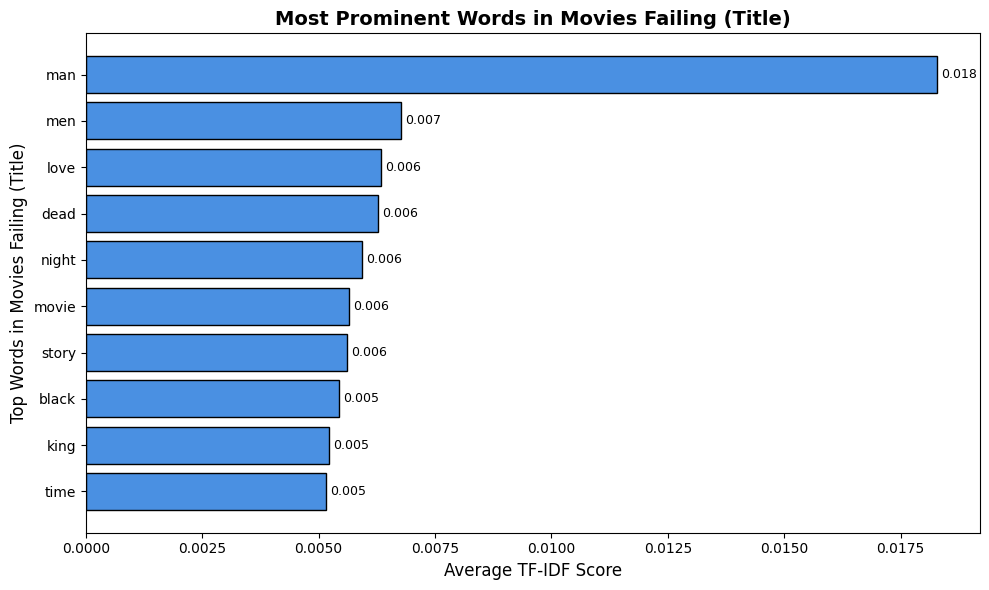

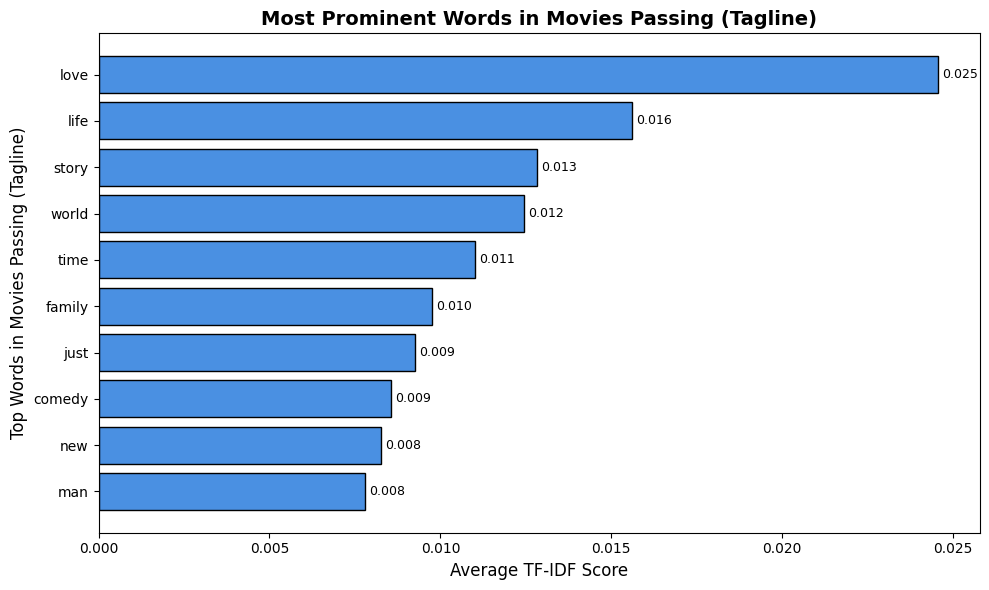

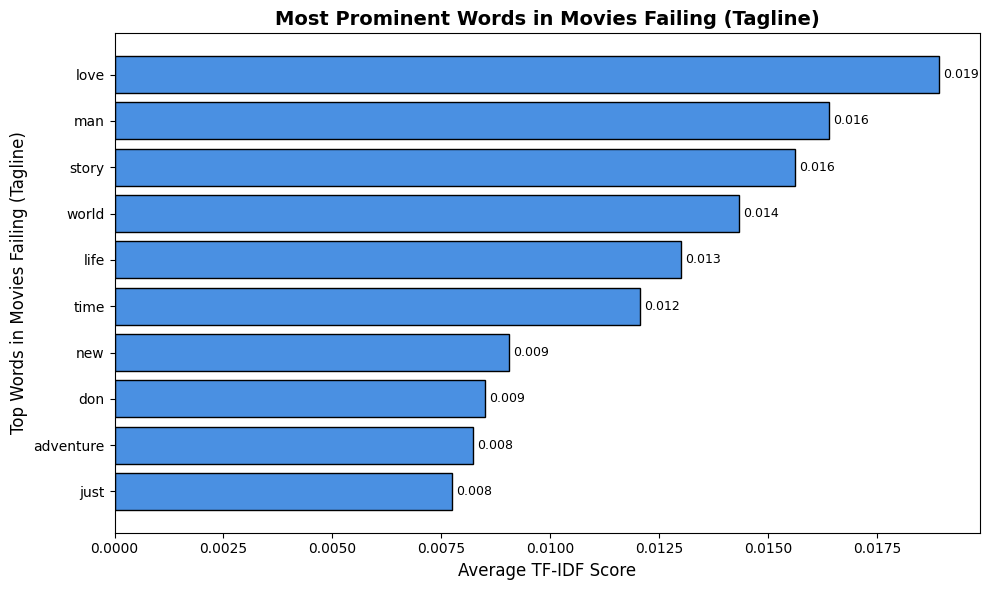

In [13]:

def plot_tfidf(df, feature, title):
    words = df[feature].astype(str)
    vect = TfidfVectorizer(stop_words='english', max_features=500)  # you can adjust max_features
    title_features = vect.fit_transform(words)

    # Convert to DataFrame
    tfidf_df = pd.DataFrame(
        title_features.toarray(),
        columns=vect.get_feature_names_out(),
        index=df.index
    )

    viewed_tfidf = tfidf_df.loc[df.index]

    mean_tfidf = viewed_tfidf.mean().sort_values(ascending=False)
    top_words = mean_tfidf.head(10)

    plt.figure(figsize=(10, 6))
    bars = plt.barh(
        top_words.index[::-1],    
        top_words.values[::-1],
        color="#4a90e2",
        edgecolor="black"
    )

    plt.xlabel("Average TF-IDF Score", fontsize=12)
    plt.ylabel(f"Top Words in {title}", fontsize=12)
    plt.title(f"Most Prominent Words in {title}", fontsize=14, fontweight='bold')
    plt.tight_layout()

    plt.bar_label(bars, fmt='%.3f', fontsize=9, padding=3)
    #plt.savefig(f"./figures/{title}_tfidf_words.png", dpi=300, bbox_inches="tight")
    plt.show()

movies_metadata = pd.read_parquet('./datasets/movies_metadata.parquet')
bechdel_ratings = pd.read_parquet('./datasets/bechdel_ratings.parquet')

movies_with_bechdel = movies_metadata.merge(bechdel_ratings, on='imdb_id', how='inner',suffixes=('', '_y'))
print(movies_with_bechdel.columns)

passing_movies = movies_with_bechdel[movies_with_bechdel['bechdel_rating'] >= 3]
failing_movies = movies_with_bechdel[movies_with_bechdel['bechdel_rating'] < 3]

plot_tfidf(passing_movies, "overview", "Movies Passing (Overview)")
plot_tfidf(failing_movies, "overview", "Movies Failing (Overview)")

plot_tfidf(passing_movies, "title", "Movies Passing (Title)")
plot_tfidf(failing_movies, "title", "Movies Failing (Title)")

plot_tfidf(passing_movies, "tagline", "Movies Passing (Tagline)")
plot_tfidf(failing_movies, "tagline", "Movies Failing (Tagline)")